In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random

In [26]:
np.random.seed(0)

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [29]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

In [30]:
num_of_samples = []

In [31]:
cols = 5
num_classes = 10

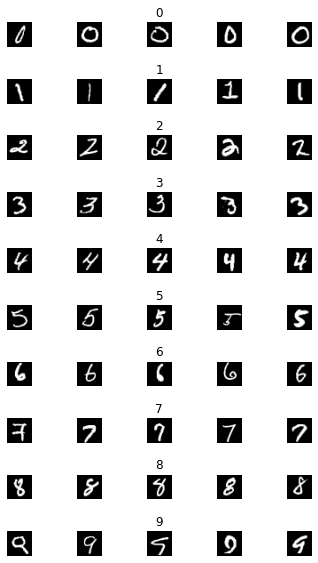

In [32]:
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

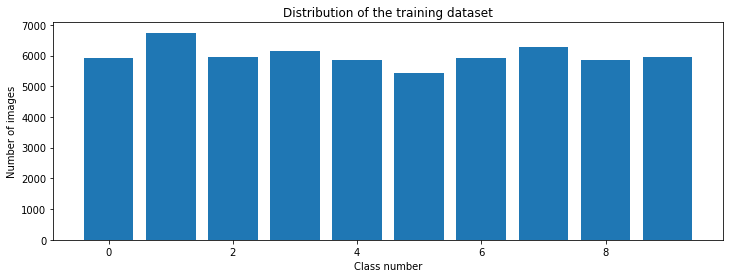

In [33]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [34]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [35]:
X_train = X_train/255 
X_test = X_test/255

In [36]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [53]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    # model.add(Dense(10, activation='sigmoid'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [54]:
model = create_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_8 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 1s 4ms/step - loss: 0.9926 - accuracy: 0.6637 - val_loss: 0.3166 - val_accuracy: 0.9057
Epoch 2/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3827 - accuracy: 0.8905 - val_loss: 0.3177 - val_accuracy: 0.9107
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3287 - accuracy: 0.9044 - val_loss: 0.2720 - val_accuracy: 0.9227
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2901 - accuracy: 0.9138 - val_loss: 0.2486 - val_accuracy: 0.9282
Epoch 5/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2726 - accuracy: 0.9191 - val_loss: 0.2355 - val_accuracy: 0.9292
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2633 - accuracy: 0.9207 - val_loss: 0.2258 - val_accuracy: 0.9323
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2581 - accuracy: 0.9231 - val_loss: 0.2123 - val_accuracy: 0.9367
Epoch 

Text(0.5, 0, 'epoch')

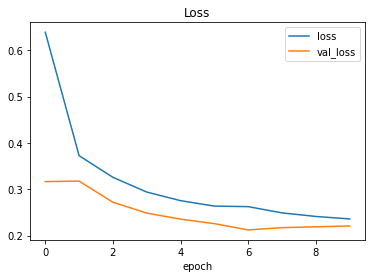

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

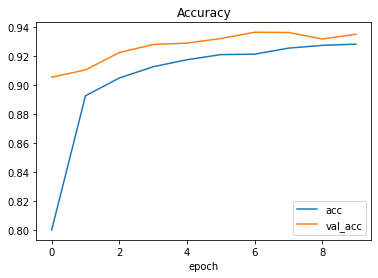

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [58]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.2630842924118042
Test accuracy: 0.9258999824523926


In [59]:
img=X_test[0]
img = img.reshape(1, 784)
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [7]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]')

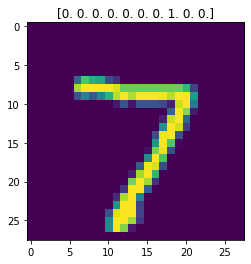

In [60]:
plt.imshow(img.reshape((28,28)))
plt.title(y_test[0])